## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from scipy.stats import normaltest, boxcox
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

In [2]:
warnings.filterwarnings('ignore')

## Import data

In [194]:
data = pd.read_csv('data/Body Fat/BodyFat - Extended.csv')
data

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.30,Y,M,23,69.9700,1.7200,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.10,Y,M,22,78.5900,1.8400,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.30,Y,M,22,69.8500,1.6800,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.40,Y,M,26,83.8000,1.8400,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.70,Y,M,24,83.5800,1.8100,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,30.40,N,F,23,59.8752,1.5621,31.3,89.0,71.0,98.5,56.0,36.2,21.0,28.0,24.5,16.3
432,7.47,N,F,21,48.5352,1.5748,29.5,79.0,62.5,89.0,49.0,33.0,20.0,25.0,22.0,15.5
433,11.98,N,F,20,51.7104,1.5748,31.5,81.5,61.5,90.0,49.5,32.0,19.5,27.5,22.5,15.0
434,11.24,N,F,22,50.8032,1.6510,30.5,85.0,64.0,88.0,45.0,32.0,19.5,24.0,21.5,15.0


## Explore data analysis

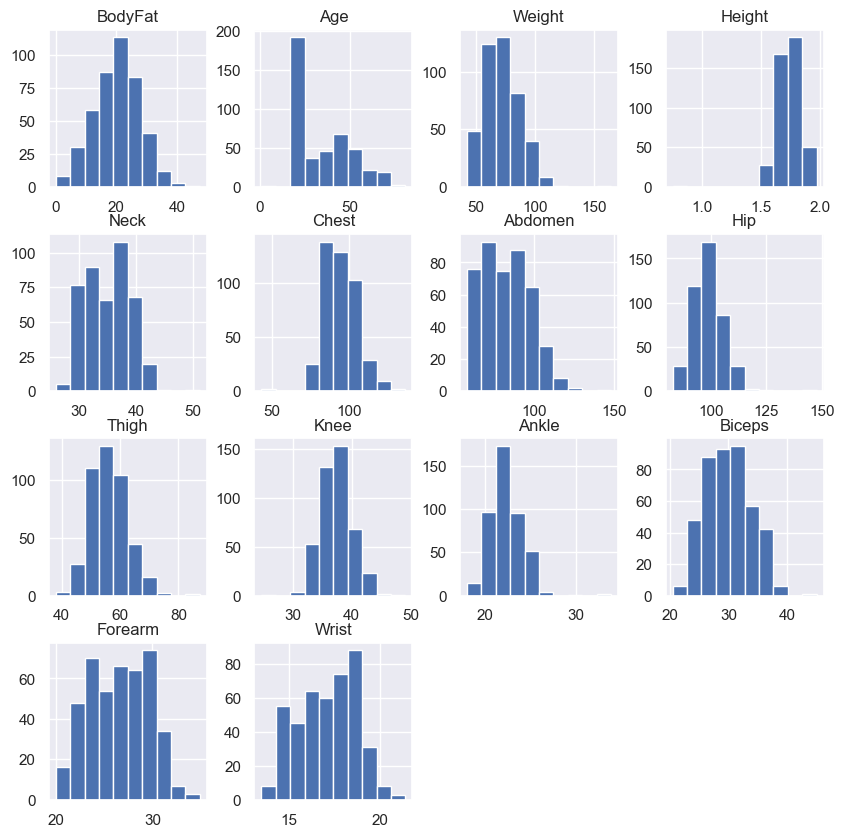

In [193]:
data.hist(figsize=(10, 10))
plt.title('Data Histograms')
plt.savefig('Images/BodyFatPred/data_histogram.png')

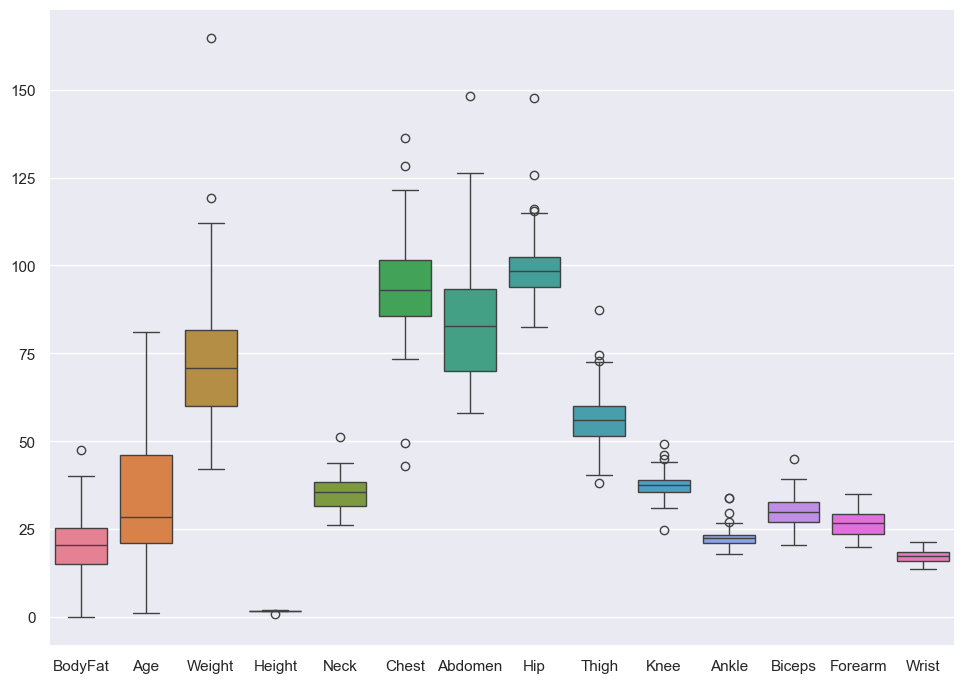

In [179]:
sn.set_theme(rc={'figure.figsize':(11.7,8.27)})
sn.boxplot(data)
plt.savefig('Images/BodyFatPred/data_boxplots.png')

## Clean data

Check for null or nan data and remove it

In [195]:
print(f"Number of na data: {data.isna().sum().sum()}")
data.dropna(axis = 0, inplace = True)
data

Number of na data: 0


,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.30,Y,M,23,69.9700,1.7200,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.10,Y,M,22,78.5900,1.8400,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.30,Y,M,22,69.8500,1.6800,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.40,Y,M,26,83.8000,1.8400,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.70,Y,M,24,83.5800,1.8100,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,30.40,N,F,23,59.8752,1.5621,31.3,89.0,71.0,98.5,56.0,36.2,21.0,28.0,24.5,16.3
432,7.47,N,F,21,48.5352,1.5748,29.5,79.0,62.5,89.0,49.0,33.0,20.0,25.0,22.0,15.5
433,11.98,N,F,20,51.7104,1.5748,31.5,81.5,61.5,90.0,49.5,32.0,19.5,27.5,22.5,15.0
434,11.24,N,F,22,50.8032,1.6510,30.5,85.0,64.0,88.0,45.0,32.0,19.5,24.0,21.5,15.0


In [196]:
data[data['BodyFat'] <= 3]

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
170,3.0,Y,M,35,69.06,1.72,37.0,92.2,81.9,92.8,54.7,36.2,22.1,30.4,27.4,17.7
171,0.7,Y,M,35,57.04,1.66,34.0,90.8,75.0,89.2,50.0,34.8,22.0,24.8,25.9,16.9
181,0.0,Y,M,40,53.75,1.73,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


In the histogram we can observe some people having zero body fat which is not possible. By searching about this limit, it is known that for men the minimum body fat is 3% and for woman 12%. Since we have no data of gender we will remove any data below 3% bodyfat.

In [197]:
data = data[data['BodyFat'] > 3]
data

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.30,Y,M,23,69.9700,1.7200,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.10,Y,M,22,78.5900,1.8400,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.30,Y,M,22,69.8500,1.6800,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.40,Y,M,26,83.8000,1.8400,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.70,Y,M,24,83.5800,1.8100,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,30.40,N,F,23,59.8752,1.5621,31.3,89.0,71.0,98.5,56.0,36.2,21.0,28.0,24.5,16.3
432,7.47,N,F,21,48.5352,1.5748,29.5,79.0,62.5,89.0,49.0,33.0,20.0,25.0,22.0,15.5
433,11.98,N,F,20,51.7104,1.5748,31.5,81.5,61.5,90.0,49.5,32.0,19.5,27.5,22.5,15.0
434,11.24,N,F,22,50.8032,1.6510,30.5,85.0,64.0,88.0,45.0,32.0,19.5,24.0,21.5,15.0


Use boxplot to remove outliers

In [198]:
columns = data.columns
for col in columns:
    if type(data[col][0]) != str:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1    #IQR is interquartile range. 

        filter = (data[col] >= Q1 - 1.5 * IQR) & (data[col] <= Q3 + 1.5 *IQR)
        data = data.loc[filter]  

data

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.30,Y,M,23,69.9700,1.7200,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.10,Y,M,22,78.5900,1.8400,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.30,Y,M,22,69.8500,1.6800,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.40,Y,M,26,83.8000,1.8400,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.70,Y,M,24,83.5800,1.8100,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,30.40,N,F,23,59.8752,1.5621,31.3,89.0,71.0,98.5,56.0,36.2,21.0,28.0,24.5,16.3
432,7.47,N,F,21,48.5352,1.5748,29.5,79.0,62.5,89.0,49.0,33.0,20.0,25.0,22.0,15.5
433,11.98,N,F,20,51.7104,1.5748,31.5,81.5,61.5,90.0,49.5,32.0,19.5,27.5,22.5,15.0
434,11.24,N,F,22,50.8032,1.6510,30.5,85.0,64.0,88.0,45.0,32.0,19.5,24.0,21.5,15.0


In [199]:
data = data[data['Age'] > 1]
data

,BodyFat,Original,Sex,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,12.30,Y,M,23,69.9700,1.7200,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,6.10,Y,M,22,78.5900,1.8400,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,25.30,Y,M,22,69.8500,1.6800,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,10.40,Y,M,26,83.8000,1.8400,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,28.70,Y,M,24,83.5800,1.8100,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,30.40,N,F,23,59.8752,1.5621,31.3,89.0,71.0,98.5,56.0,36.2,21.0,28.0,24.5,16.3
432,7.47,N,F,21,48.5352,1.5748,29.5,79.0,62.5,89.0,49.0,33.0,20.0,25.0,22.0,15.5
433,11.98,N,F,20,51.7104,1.5748,31.5,81.5,61.5,90.0,49.5,32.0,19.5,27.5,22.5,15.0
434,11.24,N,F,22,50.8032,1.6510,30.5,85.0,64.0,88.0,45.0,32.0,19.5,24.0,21.5,15.0


array([[<Axes: title={'center': 'BodyFat'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Neck'}>,
        <Axes: title={'center': 'Chest'}>,
        <Axes: title={'center': 'Abdomen'}>,
        <Axes: title={'center': 'Hip'}>],
       [<Axes: title={'center': 'Thigh'}>,
        <Axes: title={'center': 'Knee'}>,
        <Axes: title={'center': 'Ankle'}>,
        <Axes: title={'center': 'Biceps'}>],
       [<Axes: title={'center': 'Forearm'}>,
        <Axes: title={'center': 'Wrist'}>, <Axes: >, <Axes: >]],
      dtype=object)

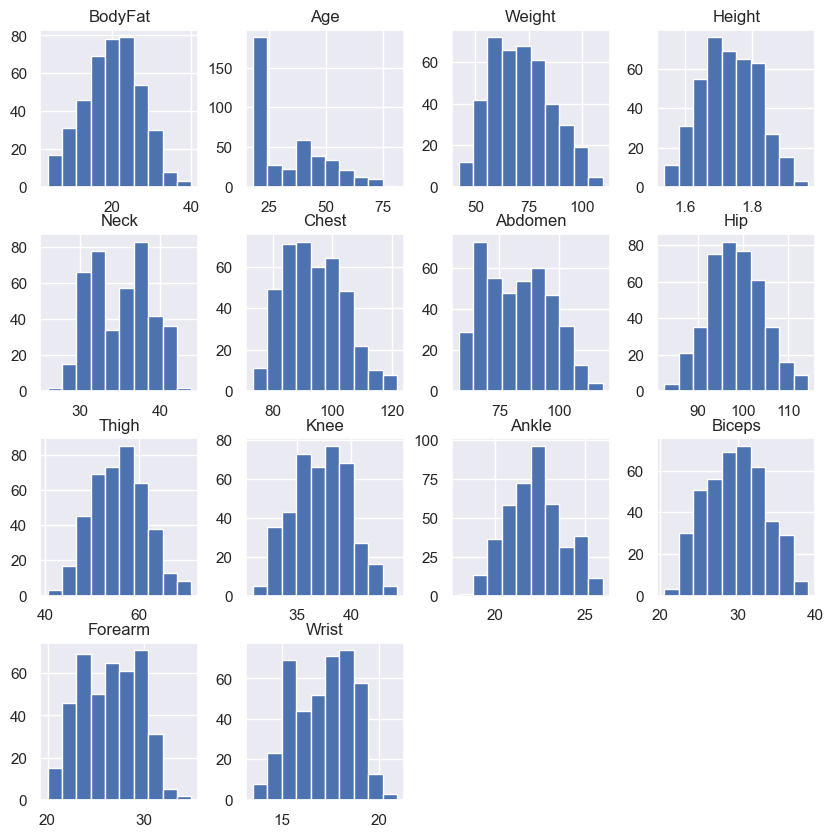

In [200]:
data.hist(figsize= (10, 10))

## Feature engineering

Check for normality 

In [201]:
num_cols = [col for col in columns if type(data[col][0]) != str]
plain_data = normaltest(data[num_cols]).pvalue
plain_data

array([1.39389533e-01, 1.93758638e-10, 1.76662554e-04, 8.17859746e-04,
       5.61906398e-33, 3.76344574e-04, 4.42084083e-18, 2.25714305e-01,
       4.54129187e-02, 2.59026837e-02, 4.82089870e-02, 1.69243381e-05,
       2.60321862e-17, 8.03140039e-14])

In [240]:
bxcx_data

[0.13592595726775505,
 0.0,
 0.00010386956217976711,
 0.000503471041775316,
 9.58125090528903e-33,
 1.6058911923355962e-05,
 5.42307389158732e-37,
 0.5609147730117165,
 0.07140830499817023,
 0.014924373475088732,
 0.11373107925497553,
 2.2268829121848083e-05,
 8.497748514097739e-18,
 1.649388974064694e-13]

Lets see if we can improve this with some transformations

In [202]:
log_data = normaltest(np.log(data[num_cols])).pvalue
sqrt_data = normaltest(np.sqrt(data[num_cols])).pvalue
bxcx_data = [normaltest(boxcox(data[col])[0]).pvalue for col in num_cols]

transf_data = np.array([plain_data, log_data, sqrt_data, bxcx_data])
transf_data.argmax(axis = 0)

array([0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 1, 1, 1, 1], dtype=int64)

So we perform the following transformations:

In [203]:
plain_data

array([1.39389533e-01, 1.93758638e-10, 1.76662554e-04, 8.17859746e-04,
       5.61906398e-33, 3.76344574e-04, 4.42084083e-18, 2.25714305e-01,
       4.54129187e-02, 2.59026837e-02, 4.82089870e-02, 1.69243381e-05,
       2.60321862e-17, 8.03140039e-14])

array([[<Axes: title={'center': 'BodyFat'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Height'}>],
       [<Axes: title={'center': 'Neck'}>,
        <Axes: title={'center': 'Chest'}>,
        <Axes: title={'center': 'Abdomen'}>,
        <Axes: title={'center': 'Hip'}>],
       [<Axes: title={'center': 'Thigh'}>,
        <Axes: title={'center': 'Knee'}>,
        <Axes: title={'center': 'Ankle'}>,
        <Axes: title={'center': 'Biceps'}>],
       [<Axes: title={'center': 'Forearm'}>,
        <Axes: title={'center': 'Wrist'}>, <Axes: >, <Axes: >]],
      dtype=object)

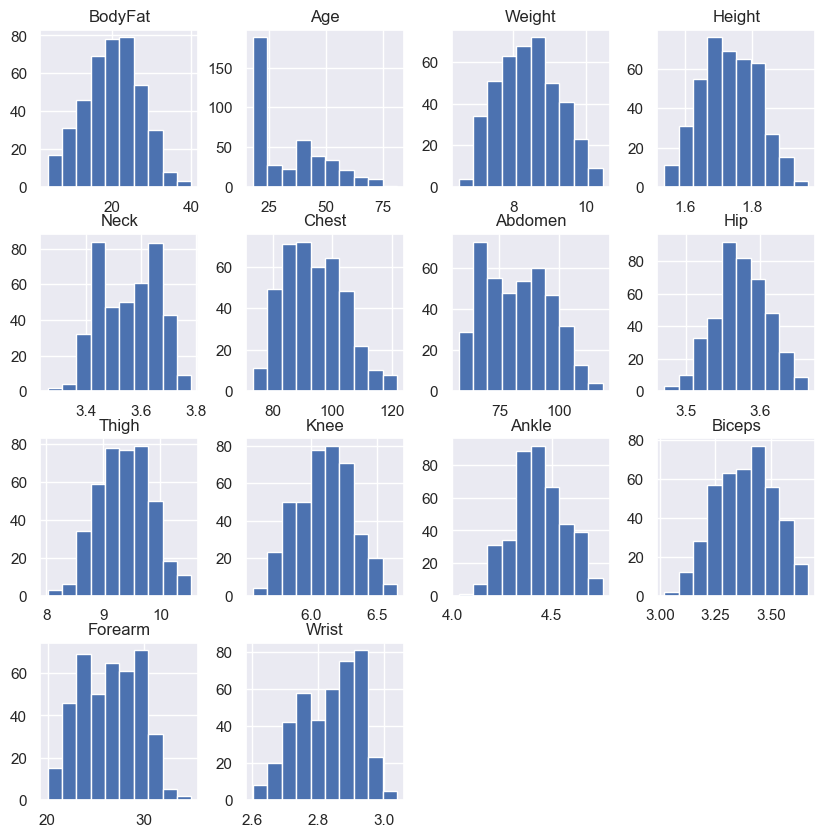

In [204]:
data[columns[4]] = np.sqrt(data[columns[4]])
data[columns[6]] = np.log(data[columns[6]])
data[columns[9]] = boxcox(data[columns[9]])[0]
data[columns[10]] = boxcox(data[columns[10]])[0]
data[columns[11]] = np.sqrt(data[columns[11]])
data[columns[12]] = boxcox(data[columns[12]])[0]
data[columns[13]] = np.log(data[columns[13]])
data[columns[15]] = np.log(data[columns[15]])

data.hist(figsize=(10, 10))

Split in test and train dataset

In [205]:
data = data[[col for col in columns if col != 'BodyFat'] + ['BodyFat']]
data.drop('Original', axis = 1, inplace=True)

In [206]:
f_data = data[data['Sex'] == 'F']
m_data = data[data['Sex'] == 'M']

In [207]:
# Reorder columns
columns = data.columns
data = data[[col for col in columns if col != 'BodyFat'] + ['BodyFat']]
columns = data.columns

X = data[columns[1:-1]]
y = data[columns[-1]]


Use standard scaler to transform our data

In [208]:
std_scaler = StandardScaler()

Create dataset with polynomial features

In [209]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)

## Regression models 

### Plain linear regression

In [210]:
lr = LinearRegression()
piplin = Pipeline([('scaler', std_scaler), ('model', lr)])
scores = cross_val_score(piplin, X, y, cv = 5)
scores.mean()

0.49742683706365404

### Lasso regression

In [241]:
test_scores_laso = []
for ii in range(10):
    laso = Lasso(alpha = 10**(2- ii))
    piplin = Pipeline([('scaler', std_scaler), ('model', laso)])
    print(f"Cross Val mean: {cross_val_score(piplin, X, y , cv = 5).mean()}")


Cross Val mean: -0.10061192621513464
Cross Val mean: -0.10061192621513464
Cross Val mean: 0.36759949813793436
Cross Val mean: 0.502817106308152
Cross Val mean: 0.49955333171742683
Cross Val mean: 0.49766439574840116
Cross Val mean: 0.497451041482016
Cross Val mean: 0.49742926483465
Cross Val mean: 0.49742708128607627
Cross Val mean: 0.49742686149570614


### Ridge regression

In [212]:
test_scores_rdg = []
for ii in range(10):
    rdg = Ridge(alpha = 10**(3- ii))
    piplin = Pipeline([('scaler', std_scaler), ('model', rdg)])
    print(f"Cross Val mean: {cross_val_score(piplin, X, y , cv = 5).mean()}")

Cross Val mean: 0.08987727093134328
Cross Val mean: 0.44176844603317117
Cross Val mean: 0.5042298014817354
Cross Val mean: 0.49959041264272647
Cross Val mean: 0.49768928888370567
Cross Val mean: 0.4974536517914336
Cross Val mean: 0.4974295243672856
Cross Val mean: 0.4974271058524649
Cross Val mean: 0.4974268639431201
Cross Val mean: 0.4974268397516071


### Elastic Net

In [245]:
en = ElasticNet(alpha = 10**(5-6), l1_ratio = 0.1*(7+1))
piplin = Pipeline([('scaler', std_scaler), ('model', en)])
cv_score = cross_val_score(piplin, X, y , cv = 5).mean()
cv_score

0.5056379639363714

In [246]:
elastic_net_means = []
for ii in range(10):
    for jj in range(9):
        en = ElasticNet(alpha = 10**(5-ii), l1_ratio = 0.1*(jj+1))
        piplin = Pipeline([('scaler', std_scaler), ('model', en)])
        cv_score = cross_val_score(piplin, X, y , cv = 5).mean()
        print(f"Cross Val mean : {cv_score}")
        elastic_net_means.append(cv_score)
max(elastic_net_means)

Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val mean : -0.10061192621513464
Cross Val me

0.5056379639363714

## Polynomial regression (degree = 2)

### Plain linear regression

In [214]:
lr = LinearRegression()
piplin = Pipeline([('scaler', std_scaler), ('model', lr)])
print(f"Cross Val mean: {cross_val_score(piplin, X_poly, y , cv = 5).mean()}")

Cross Val mean: 0.3368812033109396


### Lasso regression

In [215]:
for ii in range(7):
    laso = Lasso(alpha = 10**(- ii))
    piplin = Pipeline([('scaler', std_scaler), ('model', laso)])
    print(f"Cross Val mean: {cross_val_score(piplin, X_poly, y , cv = 5).mean()}")

Cross Val mean: 0.3595501171067701
Cross Val mean: 0.4960610077364899
Cross Val mean: 0.5159502901431806
Cross Val mean: 0.5239130498419975
Cross Val mean: 0.5226472767398186
Cross Val mean: 0.5224765476659484
Cross Val mean: 0.5224585463889019


### Ridge regression

In [216]:
for ii in range(10):
    rdg = Ridge(alpha = 10**(5 - ii))
    piplin = Pipeline([('scaler', std_scaler), ('model', rdg)])
    print(f"Cross Val mean: {cross_val_score(piplin, X_poly, y , cv = 5).mean()}")

Cross Val mean: -0.09299731329720382
Cross Val mean: -0.03668891174823115
Cross Val mean: 0.30045017809363556
Cross Val mean: 0.48862441524182787
Cross Val mean: 0.5084247419866855
Cross Val mean: 0.5275243023175452
Cross Val mean: 0.5309699674857589
Cross Val mean: 0.5092651156497012
Cross Val mean: 0.47233188751154004
Cross Val mean: 0.40004148948518825


### Elastic Net

In [247]:
np.argmax(test_scores_en)

46

In [217]:
test_scores_en = []
for ii in range(7):
    for jj in range(9):
        en = ElasticNet(alpha = 10**(2-ii), l1_ratio = 0.1*(jj+1))
        piplin = Pipeline([('scaler', std_scaler), ('model', en)])
        cv_score = cross_val_score(piplin, X_poly, y , cv = 5).mean()
        print(f"Cross Val mean: {cv_score}")
        test_scores_en.append(cv_score)
max(test_scores_en)

Cross Val mean: -0.10061192621513464
Cross Val mean: -0.10061192621513464
Cross Val mean: -0.10061192621513464
Cross Val mean: -0.10061192621513464
Cross Val mean: -0.10061192621513464
Cross Val mean: -0.10061192621513464
Cross Val mean: -0.10061192621513464
Cross Val mean: -0.10061192621513464
Cross Val mean: -0.10061192621513464
Cross Val mean: -0.028738026397473627
Cross Val mean: -0.05064670498768973
Cross Val mean: -0.068087112974986
Cross Val mean: -0.09753196285993596
Cross Val mean: -0.10061192621513464
Cross Val mean: -0.10061192621513464
Cross Val mean: -0.10061192621513464
Cross Val mean: -0.10061192621513464
Cross Val mean: -0.10061192621513464
Cross Val mean: 0.4220790558464517
Cross Val mean: 0.4112719725480062
Cross Val mean: 0.39751530701989435
Cross Val mean: 0.3826859600449321
Cross Val mean: 0.37231585461145666
Cross Val mean: 0.36477113973362635
Cross Val mean: 0.35819914809360853
Cross Val mean: 0.356963059647057
Cross Val mean: 0.35642473927103174
Cross Val mean: 

0.5245662333416552

## Lets split this information for men and women

### Men data

In [252]:
# Reorder columns
columns = m_data.columns
m_data = m_data[[col for col in columns if col != 'BodyFat'] + ['BodyFat']]
columns = m_data.columns

m_X = m_data[columns[1:-1]]
m_y = m_data[columns[-1]]

m_X_train, m_X_test, m_y_train, m_y_test = train_test_split(m_X, m_y, test_size = 0.2, shuffle=True)

In [253]:
poly = PolynomialFeatures(degree = 2)
m_poly_X = poly.fit_transform(m_X)

m_X_poly_train, m_X_poly_test, m_y_train, m_y_test = train_test_split(m_poly_X, m_y, test_size = 0.2, shuffle=True)

In [261]:
polynames = poly.get_feature_names_out()

#### Linear regression

In [220]:
lr = LinearRegression()
piplin = Pipeline([('scaler', std_scaler), ('model', lr)])
print(f"Cross Val mean: {cross_val_score(piplin, m_X, m_y , cv = 5).mean()}")

Cross Val mean: 0.6072858909882619


In [221]:
test_scores_laso = []
for ii in range(10):
    laso = Lasso(alpha = 10**(- ii))
    piplin = Pipeline([('scaler', std_scaler), ('model', laso)])
    print(f"Cross Val mean: {cross_val_score(piplin, m_X, m_y , cv = 5).mean()}")

Cross Val mean: 0.5567013953936455
Cross Val mean: 0.612720900294166
Cross Val mean: 0.6095329991971048
Cross Val mean: 0.6075443450606295
Cross Val mean: 0.6073125456629799
Cross Val mean: 0.60728855880417
Cross Val mean: 0.6072861578039254
Cross Val mean: 0.6072859176723524
Cross Val mean: 0.6072858936563404
Cross Val mean: 0.6072858912550751


In [222]:
for ii in range(10):
    rdg = Ridge(alpha = 10**(5 - ii))
    piplin = Pipeline([('scaler', std_scaler), ('model', rdg)])
    print(f"Cross Val mean: {cross_val_score(piplin, m_X, m_y , cv = 5).mean()}")

Cross Val mean: -0.057920511013468824
Cross Val mean: 0.024880698444444425
Cross Val mean: 0.3047018243455969
Cross Val mean: 0.5319422514883527
Cross Val mean: 0.6011282341330213
Cross Val mean: 0.6088827018023966
Cross Val mean: 0.6075114613357918
Cross Val mean: 0.6073092221961378
Cross Val mean: 0.6072882319861297
Cross Val mean: 0.6072861251669565


In [223]:
elastic_net_means = []
for ii in range(10):
    for jj in range(9):
        en = ElasticNet(alpha = 10**(5-ii), l1_ratio = 0.1*(jj+1))
        piplin = Pipeline([('scaler', std_scaler), ('model', en)])
        cv_score = cross_val_score(piplin, m_X, m_y , cv = 5).mean()
        print(f"Cross Val mean : {cv_score}")
        elastic_net_means.append(cv_score)
max(elastic_net_means)

Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val me

0.6136366579653763

#### Polynomial

In [224]:
lr = LinearRegression()
piplin = Pipeline([('scaler', std_scaler), ('model', lr)])
print(f"Cross Val mean: {cross_val_score(piplin, m_poly_X, m_y , cv = 5).mean()}")

Cross Val mean: -4.079768143050949


In [225]:
test_scores_laso = []
for ii in range(10):
    laso = Lasso(alpha = 10**(- ii))
    piplin = Pipeline([('scaler', std_scaler), ('model', laso)])
    print(f"Cross Val mean: {cross_val_score(piplin, m_poly_X, m_y , cv = 5).mean()}")

Cross Val mean: 0.5588894276335493
Cross Val mean: 0.6143670688693614
Cross Val mean: 0.6099215192692282
Cross Val mean: 0.5967862994972684
Cross Val mean: 0.5888313909303239
Cross Val mean: 0.588062875058091
Cross Val mean: 0.5879845103487593
Cross Val mean: 0.5879766680578415
Cross Val mean: 0.5879758842218049
Cross Val mean: 0.5879758058448331


In [254]:
std_scaler.fit(m_X_poly_train)
m_X_poly_train_sc = std_scaler.transform(m_X_poly_train)
m_X_poly_test_sc = std_scaler.transform(m_X_poly_test)

In [341]:
m_features = []
for ii in range(100):
    poly = PolynomialFeatures(degree = 2)
    m_poly_X = poly.fit_transform(m_X)

    m_X_poly_train, m_X_poly_test, m_y_train, m_y_test = train_test_split(m_poly_X, m_y, test_size = 0.2, shuffle=True)

    laso = Lasso(alpha = 0.1)
    laso.fit(m_X_poly_train, m_y_train)
    sorted(np.abs(laso.coef_))[-5:-1]

    arr = np.abs(laso.coef_)
    # Get indices of top 5 maximum values
    top_indices = np.argpartition(arr, -5)[-5:]

    # Sort the top 5 maximum values and their indices
    top_values = arr[top_indices]
    sorted_indices = top_indices[np.argsort(top_values)]
    m_features.append(polynames[top_indices])

from collections import Counter

arr = m_features

# Flatten the array of arrays into a single list of strings
flat_arr = [item for sublist in arr for item in sublist]

# Count the occurrences of each string
counts = Counter(flat_arr)

# Get the top 5 most common strings and their counts
top_5 = counts.most_common(5)

print("Top 5 most repeated strings:")
for string, count in top_5:
    print(f"{string}: {count} occurrences")

Top 5 most repeated strings:
Abdomen: 100 occurrences
Forearm Wrist: 75 occurrences
Chest: 72 occurrences
Age Neck: 69 occurrences
Abdomen Hip: 44 occurrences


In [326]:
laso = Lasso(alpha = 0.1)
laso.fit(m_X_poly_train, m_y_train)
sorted(np.abs(laso.coef_))[-5:-1]

[0.12795904613185,
 0.18384355505398964,
 0.20689043581533173,
 0.2910745469659481]

In [327]:
arr = np.abs(laso.coef_)
# Get indices of top 5 maximum values
top_indices = np.argpartition(arr, -5)[-5:]

# Sort the top 5 maximum values and their indices
top_values = arr[top_indices]
sorted_indices = top_indices[np.argsort(top_values)]

In [320]:
top_indices

array([ 70,  17,  82, 103,   6], dtype=int64)

In [328]:
laso.coef_[top_indices]

array([-0.12795905,  0.18384356,  0.67193622, -0.29107455, -0.20689044])

In [329]:
polynames[top_indices]

array(['Age Neck', 'Chest', 'Abdomen', 'Forearm Wrist', 'Age Height'],
      dtype=object)

In [ ]:
laso = Lasso(alpha = 10**(-1))

In [226]:
for ii in range(10):
    rdg = Ridge(alpha = 10**(5 - ii))
    piplin = Pipeline([('scaler', std_scaler), ('model', rdg)])
    print(f"Cross Val mean: {cross_val_score(piplin, m_poly_X, m_y , cv = 5).mean()}")

Cross Val mean: 0.015996763806517423
Cross Val mean: 0.28846326882349577
Cross Val mean: 0.514701406084386
Cross Val mean: 0.5946645654635591
Cross Val mean: 0.6029910608919348
Cross Val mean: 0.6067220928803241
Cross Val mean: 0.5911057219571363
Cross Val mean: 0.5486599785106405
Cross Val mean: 0.4162902985432823
Cross Val mean: -0.10777968388857465


In [227]:
elastic_net_means = []
for ii in range(10):
    for jj in range(9):
        en = ElasticNet(alpha = 10**(5-ii), l1_ratio = 0.1*(jj+1))
        piplin = Pipeline([('scaler', std_scaler), ('model', en)])
        cv_score = cross_val_score(piplin, m_poly_X, m_y , cv = 5).mean()
        print(f"Cross Val mean : {cv_score}")
        elastic_net_means.append(cv_score)
max(elastic_net_means)

Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val mean : -0.06903278612289983
Cross Val me

0.6104114936579945

### Women

In [228]:
# Reorder columns
columns = f_data.columns
f_data = f_data[[col for col in columns if col != 'BodyFat'] + ['BodyFat']]
columns = f_data.columns

f_X = f_data[columns[1:-1]]
f_y = f_data[columns[-1]]

In [229]:
poly = PolynomialFeatures(degree = 2)
f_poly_X = poly.fit_transform(f_X)

In [250]:
f_poly_X.shape

(178, 105)

#### Linear regression

In [230]:
lr = LinearRegression()
piplin = Pipeline([('scaler', std_scaler), ('model', lr)])
print(f"Cross Val mean: {cross_val_score(piplin, f_X, f_y , cv = 5).mean()}")

Cross Val mean: 0.5319657447552265


In [231]:
test_scores_laso = []
for ii in range(10):
    laso = Lasso(alpha = 10**(- ii))
    piplin = Pipeline([('scaler', std_scaler), ('model', laso)])
    print(f"Cross Val mean: {cross_val_score(piplin, f_X, f_y , cv = 5).mean()}")

Cross Val mean: 0.48778482972013587
Cross Val mean: 0.5477620207047864
Cross Val mean: 0.535650387748142
Cross Val mean: 0.532422662737029
Cross Val mean: 0.5320124031416799
Cross Val mean: 0.5319704090898042
Cross Val mean: 0.531966212265898
Cross Val mean: 0.5319657916323072
Cross Val mean: 0.5319657494591155
Cross Val mean: 0.5319657452209879


In [232]:
test_scores_laso = []
for ii in range(10):
    rdg = Ridge(alpha = 10**(3- ii))
    piplin = Pipeline([('scaler', std_scaler), ('model', rdg)])
    print(f"Cross Val mean: {cross_val_score(piplin, f_X, f_y , cv = 5).mean()}")

Cross Val mean: 0.33571984267470034
Cross Val mean: 0.5213713564435313
Cross Val mean: 0.5532537947342475
Cross Val mean: 0.5360388690706824
Cross Val mean: 0.5324123371802951
Cross Val mean: 0.5320108451010299
Cross Val mean: 0.5319702592568153
Cross Val mean: 0.5319661962501124
Cross Val mean: 0.5319657899051624
Cross Val mean: 0.5319657492702248


In [233]:
elastic_net_means = []
for ii in range(10):
    for jj in range(9):
        en = ElasticNet(alpha = 10**(5-ii), l1_ratio = 0.1*(jj+1))
        piplin = Pipeline([('scaler', std_scaler), ('model', en)])
        cv_score = cross_val_score(piplin, f_X, f_y , cv = 5).mean()
        print(f"Cross Val mean : {cv_score}")
        elastic_net_means.append(cv_score)
max(elastic_net_means)

Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val me

0.5560470426400679

### Polynomial

In [234]:
lr = LinearRegression()
piplin = Pipeline([('scaler', std_scaler), ('model', lr)])
print(f"Cross Val mean: {cross_val_score(piplin, f_poly_X, f_y , cv = 5).mean()}")

Cross Val mean: -1.5023897560432402


In [235]:
test_scores_laso = []
for ii in range(10):
    laso = Lasso(alpha = 10**(- ii))
    piplin = Pipeline([('scaler', std_scaler), ('model', laso)])
    print(f"Cross Val mean: {cross_val_score(piplin, f_poly_X, f_y , cv = 5).mean()}")

Cross Val mean: 0.49256876137899824
Cross Val mean: 0.5479197467674961
Cross Val mean: 0.529198480079229
Cross Val mean: 0.48939549130489113
Cross Val mean: 0.4827624480611513
Cross Val mean: 0.482102724593829
Cross Val mean: 0.48203825046790827
Cross Val mean: 0.4820317888901375
Cross Val mean: 0.48203114267740527
Cross Val mean: 0.4820310780549345


In [342]:
f_features = []
for ii in range(100):
    poly = PolynomialFeatures(degree = 2)
    f_poly_X = poly.fit_transform(f_X)

    f_X_poly_train, f_X_poly_test, f_y_train, f_y_test = train_test_split(f_poly_X, f_y, test_size = 0.2, shuffle=True)

    laso = Lasso(alpha = 0.1)
    laso.fit(f_X_poly_train, f_y_train)
    sorted(np.abs(laso.coef_))[-5:-1]

    arr = np.abs(laso.coef_)
    # Get indices of top 5 maximum values
    top_indices = np.argpartition(arr, -5)[-5:]

    # Sort the top 5 maximum values and their indices
    top_values = arr[top_indices]
    sorted_indices = top_indices[np.argsort(top_values)]
    m_features.append(polynames[top_indices])

from collections import Counter

arr = m_features

# Flatten the array of arrays into a single list of strings
flat_arr = [item for sublist in arr for item in sublist]

# Count the occurrences of each string
counts = Counter(flat_arr)

# Get the top 5 most common strings and their counts
top_5 = counts.most_common(5)

print("Top 5 most repeated strings:")
for string, count in top_5:
    print(f"{string}: {count} occurrences")

Top 5 most repeated strings:
Abdomen: 100 occurrences
Chest Hip: 99 occurrences
Height Chest: 97 occurrences
Abdomen Hip: 96 occurrences
Age Knee: 86 occurrences


In [311]:
poly = PolynomialFeatures(degree = 2)
f_poly_X = poly.fit_transform(f_X)

f_X_poly_train, f_X_poly_test, f_y_train, f_y_test = train_test_split(f_poly_X, f_y, test_size = 0.2, shuffle=True)

In [312]:
f_polynames = poly.get_feature_names_out()

In [313]:
laso = Lasso(alpha = 10**(-1))
laso.fit(f_X_poly_train, f_y_train)
laso.score(f_X_poly_test, f_y_test)

0.6717527208991867

In [314]:
arr = np.abs(laso.coef_)
# Get indices of top 5 maximum values
top_indices = np.argpartition(arr, -5)[-5:]

# Sort the top 5 maximum values and their indices
top_values = arr[top_indices]
sorted_indices = top_indices[np.argsort(top_values)]

In [315]:
top_values

array([0.16746045, 0.19975229, 0.28665478, 0.29457378, 0.36955484])

In [316]:
top_indices

array([51, 22, 62, 41, 21], dtype=int64)

In [236]:
for ii in range(10):
    rdg = Ridge(alpha = 10**(5- ii))
    piplin = Pipeline([('scaler', std_scaler), ('model', rdg)])
    print(f"Cross Val mean: {cross_val_score(piplin, f_poly_X, f_y , cv = 5).mean()}")

Cross Val mean: -0.0056841575914003736
Cross Val mean: 0.3040136479914195
Cross Val mean: 0.49362567513482636
Cross Val mean: 0.5554647236061557
Cross Val mean: 0.5393601030083787
Cross Val mean: 0.5253803289370931
Cross Val mean: 0.4870693734906871
Cross Val mean: 0.3665654722056873
Cross Val mean: 0.013713093840049595
Cross Val mean: -0.384160123135638


In [237]:
elastic_net_means = []
for ii in range(10):
    for jj in range(9):
        en = ElasticNet(alpha = 10**(5-ii), l1_ratio = 0.1*(jj+1))
        piplin = Pipeline([('scaler', std_scaler), ('model', en)])
        cv_score = cross_val_score(piplin, f_poly_X, f_y , cv = 5).mean()
        print(f"Cross Val mean : {cv_score}")
        elastic_net_means.append(cv_score)
max(elastic_net_means)

Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val mean : -0.09728916515871133
Cross Val me

0.549918406837956

# What happens if we don't have access to the density of the person

In [ ]:
X_no_den = data[columns[1:-1]]

X_train_no_den, X_test_no_den, y_train_no_den, y_test_no_den = train_test_split(X_no_den, y, test_size = 0.2, random_state = 42, shuffle=True)

std_scaler = StandardScaler()

std_scaler.fit(X_train_no_den)
X_train_sc_no_den = std_scaler.transform(X_train_no_den)
X_test_sc_no_den = std_scaler.transform(X_test_no_den)

poly_no_den = PolynomialFeatures(degree = 2)
poly_no_den.fit(X_train_sc_no_den)
X_train_poly_no_den = poly_no_den.transform(X_train_sc_no_den)
X_test_poly_no_den = poly_no_den.transform(X_test_sc_no_den)

### Linear Regression (plain)

In [ ]:
lr_no_den = LinearRegression()
lr_no_den_pred = lr_no_den.fit(X_train_sc_no_den, y_train_no_den)
print(lr_no_den_pred.score(X_test_sc_no_den, y_test_no_den))
lr_no_den_pred.coef_

0.6577547474917287


array([ 0.68866183,  1.72645678, -1.35722304, -0.97649962, -0.6154861 ,
        8.05759057, -0.76373823,  0.08622278, -0.43484257, -0.36677772,
        0.20491539,  0.26557172, -1.33205194])

### Lasso regression

In [ ]:
test_scores_laso_no_den = []
for ii in range(10):
    laso_no_den = Lasso(alpha = 10**(-ii), max_iter = 10000)
    laso_pred_no_den = laso_no_den.fit(X_train_sc_no_den, y_train_no_den)
    test_scores_laso_no_den.append(laso_pred_no_den.score(X_test_sc_no_den, y_test_no_den))
test_scores_laso_no_den

[0.6252786948079433,
 0.6521808109949999,
 0.655454117480631,
 0.6575521441653767,
 0.6577347595127797,
 0.6577527516441564,
 0.6577545479452366,
 0.6577547275383329,
 0.6577547454957948,
 0.6577547472921454]

### Ridge regression

In [ ]:
test_scores_rdg_no_den = []
for ii in range(7):
    rdg_no_den = Ridge(alpha = 10**(3 - ii))
    rdg_pred_no_den = rdg_no_den.fit(X_train_sc_no_den, y_train_no_den)
    test_scores_rdg_no_den.append(rdg_pred_no_den.score(X_test_sc_no_den, y_test_no_den))
test_scores_rdg_no_den

[0.36885397874882586,
 0.599411577863247,
 0.647191060739101,
 0.6568414895670409,
 0.6576733287441654,
 0.6577467302112431,
 0.6577539470407319]

## Polynomial regression

In [ ]:
lr_no_den = LinearRegression()
lr_no_den_pred = lr_no_den.fit(X_train_poly_no_den, y_train_no_den)
print(lr_no_den_pred.score(X_test_poly_no_den, y_test_no_den))

0.2528787856940803


In [ ]:
test_scores_laso_no_den = []
for ii in range(10):
    laso_no_den = Lasso(alpha = 0.2**ii, max_iter = 10000)
    laso_pred_no_den = laso_no_den.fit(X_train_poly_no_den, y_train_no_den)
    test_scores_laso_no_den.append(laso_pred_no_den.score(X_test_poly_no_den, y_test_no_den))
test_scores_laso_no_den

c:\Users\gilbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.909e+01, tolerance: 1.254e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\gilbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.520e+02, tolerance: 1.254e+00
  model = cd_fast.enet_coordinate_descent(
c:\Users\gilbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

[0.6262071349289711,
 0.6572138387956273,
 0.6183781994713737,
 0.5440905733725492,
 0.3598331704764449,
 0.2757246918770434,
 0.25584881348376254,
 0.25173502858031904,
 0.25090669493603446,
 0.25074080563382295]

In [ ]:
test_scores_rdg_no_den = []
for ii in range(7):
    rdg_no_den = Ridge(alpha = 10**(3 - ii))
    rdg_pred_no_den = rdg_no_den.fit(X_train_poly_no_den, y_train_no_den)
    test_scores_rdg_no_den.append(rdg_pred_no_den.score(X_test_poly_no_den, y_test_no_den))
test_scores_rdg_no_den

[0.36798112930661286,
 0.574582908564004,
 0.6093261952786617,
 0.5558265921898848,
 0.38622028474008463,
 0.27439714875007915,
 0.2551887994696018]